In [ ]:
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

from wordcloud import WordCloud
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**DEFINICION DE VARIABLES DE LA EXTRACCION**

In [ ]:
semana = 2
inicio_semana = 10
fin_semana = 16
num_mes = 9
mes = 'septiembre'

anio = 2023

**SE CARGA EL ARCHIVO CON EL HISTORICO DE DATOS**

In [ ]:
base = pd.read_excel('horoscopos.xlsx')

In [ ]:
signo = 'Aries'
x = base.loc[(base['Signo']==signo) & (base['num_mes']==num_mes) & (base['num_semana']==semana)&(base['Anio']==anio),'Horoscopo']
list(x)

['La carta de la ‘Rueda de la Fortuna’ nos dice que son tiempos de estar para arriba, habrá una recompensa económica, por un trabajo que habías hecho en el pasado, tienes que sanar tu economía, pagar tus deudas y empezar a ahorrar, ver si tienes que salir de viaje para el mes de septiembre. Es el tiempo de poner un negocio o tener un cambio en cuestiones laborales. No te detengas, sigue progresando en tu vida. Quítate los malos pensamientos. Te buscarán dos amores nuevos.']

## Estructura de los datos

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Signo       264 non-null    object
 1   Horoscopo   264 non-null    object
 2   Ini_semana  264 non-null    int64 
 3   Fin_semana  264 non-null    int64 
 4   Mes         264 non-null    object
 5   Anio        264 non-null    int64 
 6   num_mes     264 non-null    int64 
 7   num_semana  264 non-null    int64 
 8   num_1       264 non-null    int64 
 9   num_2       264 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 20.8+ KB


In [ ]:
base['Signo'].value_counts()

Aries          22
Tauro          22
Géminis        22
Cáncer         22
Leo            22
Virgo          22
Libra          22
Escorpión      22
Sagitario      22
Capricornio    22
Acuario        22
Piscis         22
Name: Signo, dtype: int64

## Preporcesamiento

In [ ]:
sw = stopwords.words('spanish')+['dice','carta','semana']

In [ ]:
#Función para eliminar signos de puntuación
def remove_punc(text):
  x = text.replace('‘','').replace('’','').replace(',','').replace('.','')
  return x

In [ ]:
#Normalización del texto
base['horos_norm'] = base['Horoscopo'].str.lower()
base['horos_norm'] = base['horos_norm'].apply(remove_punc)
base['horos_norm'].head(5)

0    te sale la carta de el mago lo que nos indica ...
1    el as de bastos nos indica que se vienen vario...
2    la carta de la torre que nos dice que estás ha...
3    la carta de el juicio nos dice que son momento...
4    la carta del sol nos dice que brillarás mucho ...
Name: horos_norm, dtype: object

In [ ]:
base.drop_duplicates(subset=['horos_norm'], inplace = True)
base['Signo'].value_counts()

Aries          17
Cáncer         17
Géminis        15
Libra          15
Escorpión      15
Sagitario      15
Tauro          14
Leo            14
Virgo          14
Capricornio    14
Acuario        14
Piscis         14
Name: Signo, dtype: int64

In [ ]:
#Para cada signo, se unifican todos sus horóscopos y se almacenan en un diccionario {'signo':'horoscopos'}
horoscopos_unificados = {}
for h in base['Signo'].unique().tolist():
  base_filtrada = base.loc[base['Signo']== h, 'horos_norm']
  cadena = ''
  for l in base_filtrada:
    s = l.split()
    s.append(' ')
    cadena += ' '.join(s)
  horoscopos_unificados[h] = cadena

In [ ]:
horoscopos_unificados_sin_sw = {}
for h in base['Signo'].unique().tolist():
  base_filtrada = base.loc[base['Signo']== h, 'horos_norm']
  cadena = ''
  for l in base_filtrada:
    s = l.split()
    s = [p for p in s if not p in sw]
    s.append(' ')
    cadena += ' '.join(s)
  horoscopos_unificados_sin_sw[h] = cadena

In [ ]:
horoscopos_unificados['Aries'][0:50]

'te sale la carta de el mago lo que nos indica que '

In [ ]:
horoscopos_unificados_sin_sw['Aries'][0:50]

'sale mago indica gran seguirás buena suerte contro'

In [ ]:
#Se unifican todos los horóscopos para observar las palabras más usadas en general
todos_horoscopos = ''
for r in base['horos_norm']:
  s = r.split()
  s.append(' ')
  todos_horoscopos += ' '.join(s)

In [ ]:
#Función para graficar el top de palabras más comunes por signos
def top_n_bigrams(signo, tex, n = 10):
  s = tex.split()
  s_bigrams = nltk.bigrams(s)
  s_bigrams = Counter(s_bigrams)
  #s_bigrams = {k:v for k,v in s_bigrams.items() if v >= n}

  names = list(s_bigrams.keys())
  names = [t[0]+' '+t[1] for t in names]
  values = list(s_bigrams.values())

  df = pd.DataFrame(zip(names,values), columns=['palabras','frecuencia'])
  df.sort_values(['frecuencia','palabras'], inplace = True, ascending=[False,False])
  df.reset_index(inplace=True, drop=True)
  df = df[0:n]
  df.sort_values(['frecuencia','palabras'], inplace = True, ascending=[True,False])
  df.reset_index(inplace=True, drop=True)

  df.plot.barh(x='palabras', y='frecuencia')
  plt.title(f'Top {n} Bigramas para {signo}')
  plt.ylabel('Bigramas')
  plt.xlabel('Frecuencia')
  plt.legend('',frameon=False)
  return plt.show()

## Visualización

### General

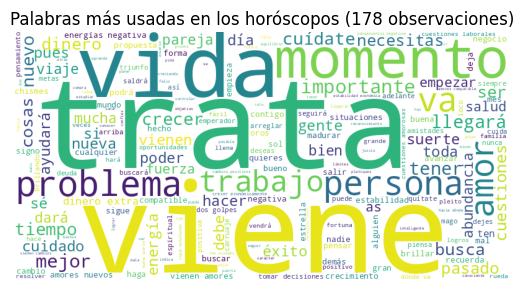

In [ ]:
wc = WordCloud(width = 800, height=400, stopwords=sw, background_color='white', repeat=False )
wc.generate(todos_horoscopos)
plt.axis('off')
plt.title(f'Palabras más usadas en los horóscopos ({base.shape[0]} observaciones)')
plt.imshow(wc)
plt.show()

In [ ]:
#Eliminación de SW
cadena_lista = todos_horoscopos.split()
todos_horoscopos_sin_sw = [p for p in cadena_lista if not p in sw]

#Generación de bigramas y filtrado de frecuencia >= 10
hg_bigrams= nltk.bigrams(todos_horoscopos_sin_sw)
hg_bigrams = Counter(hg_bigrams)
hg_bigrams = {k: v for k, v in hg_bigrams.items() if v >= 10}

#Separación de llaves y valores
names = list(hg_bigrams.keys())
names = [t[0]+' '+t[1] for t in names]
values = list(hg_bigrams.values())

#DataFrame de frecuencias
mas_frecuentes_gral = pd.DataFrame(zip(names,values),columns =['palabras','frecuencia'])
mas_frecuentes_gral.sort_values(['frecuencia','palabras'], inplace = True, ascending=[True,False])
mas_frecuentes_gral.reset_index(inplace=True, drop=True)

#### Bigramas más frecuentes

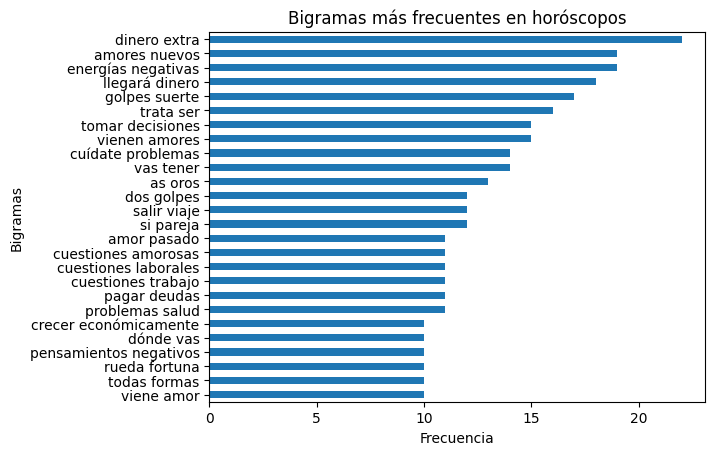

In [ ]:
mas_frecuentes_gral.plot.barh(x='palabras', y='frecuencia')
plt.title(f'Bigramas más frecuentes en horóscopos')
plt.ylabel('Bigramas')
plt.xlabel('Frecuencia')
plt.legend('',frameon=False)
plt.show()

### Por signo

In [ ]:
for k,v in horoscopos_unificados.items():
  wc = WordCloud(width = 800, height = 400, stopwords = sw, background_color='white', repeat = False)
  wc.generate(v)
  plt.axis('off')
  plt.title(k)
  plt.imshow(wc, interpolation = 'bilinear')
  plt.show()

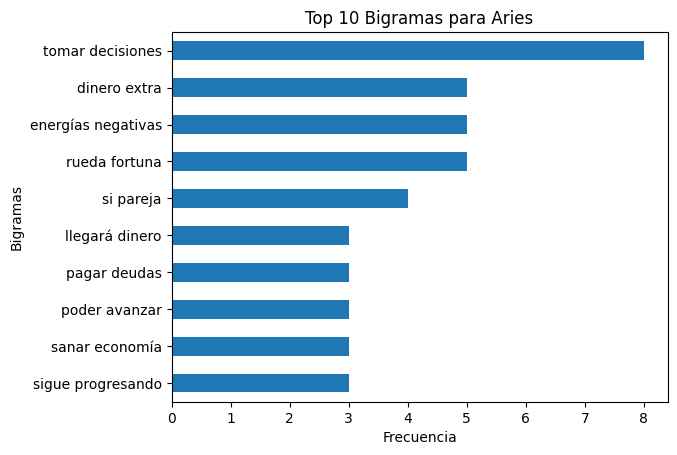

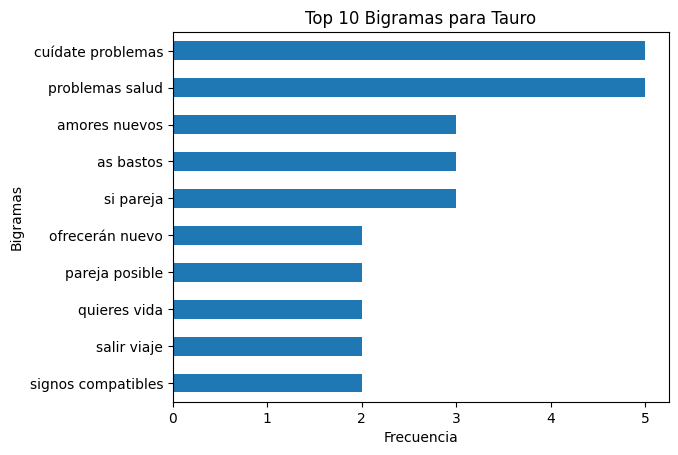

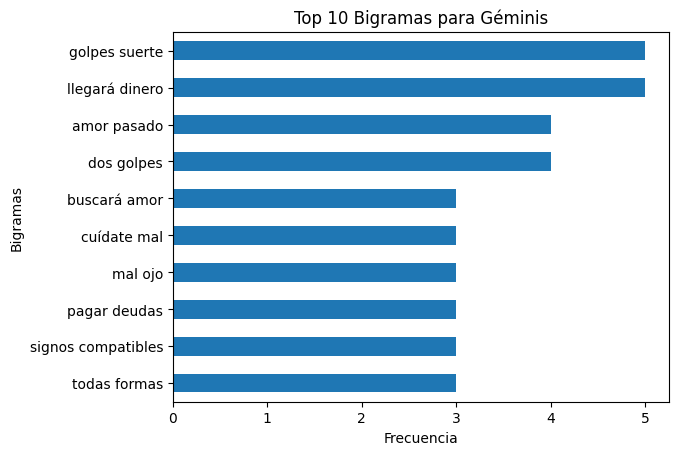

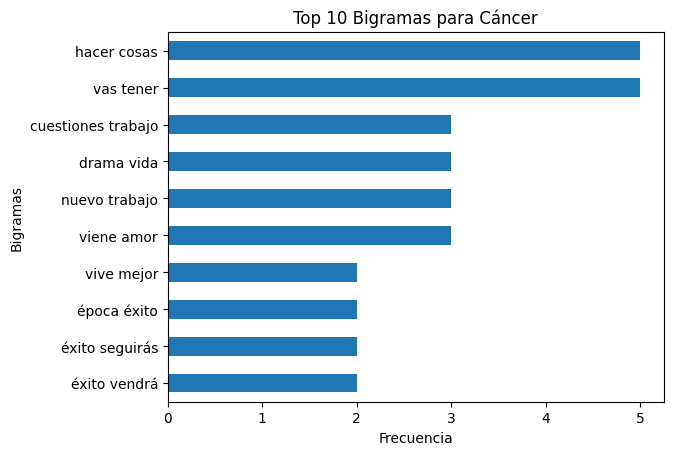

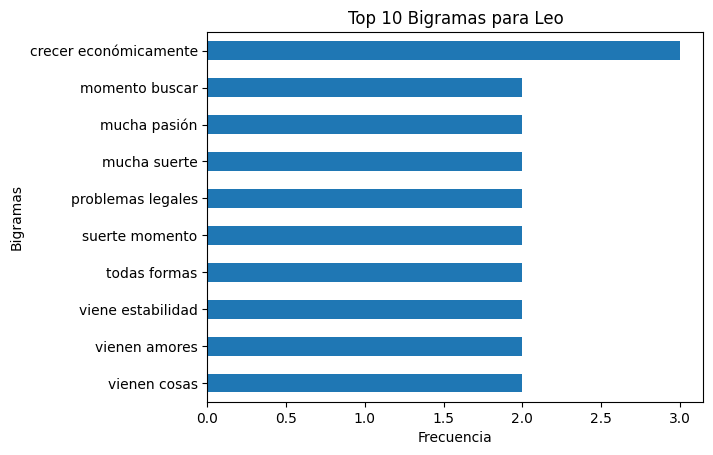

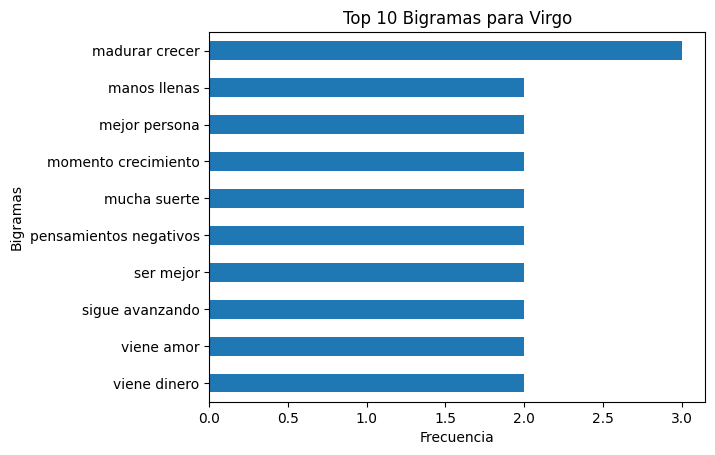

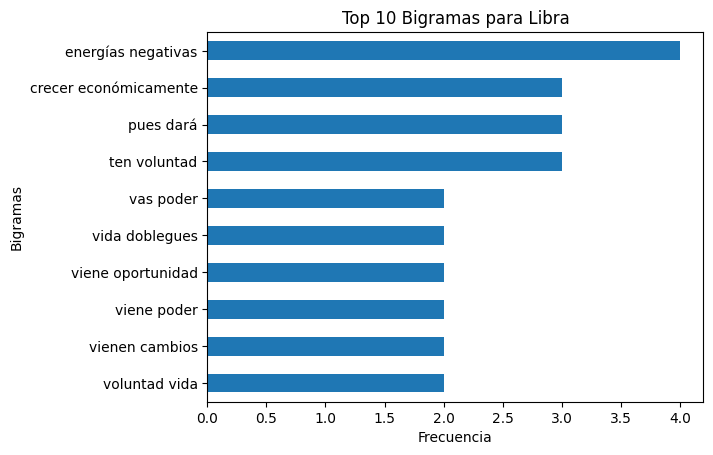

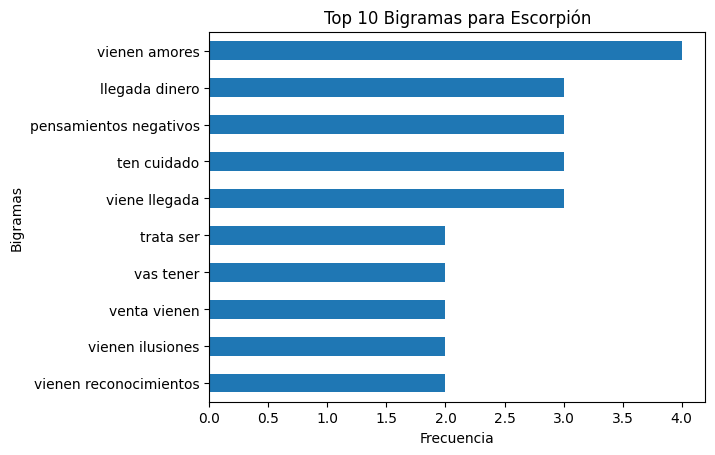

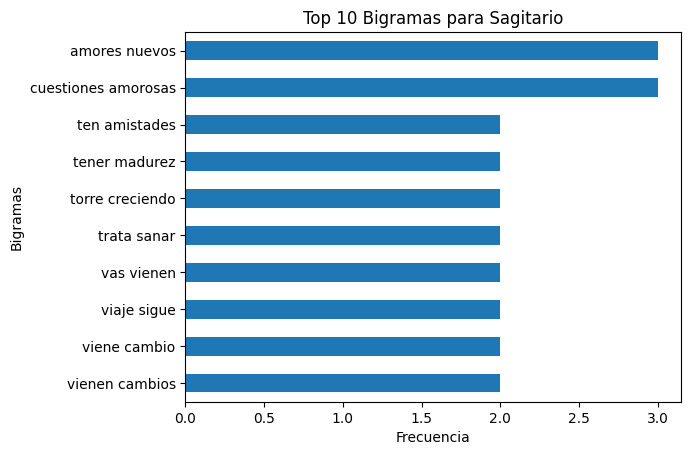

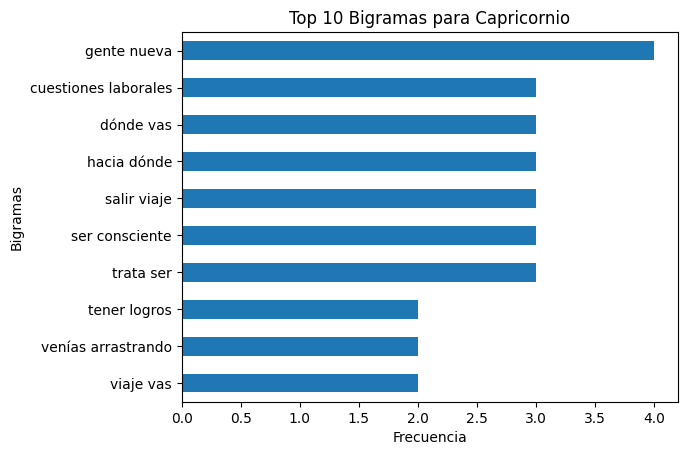

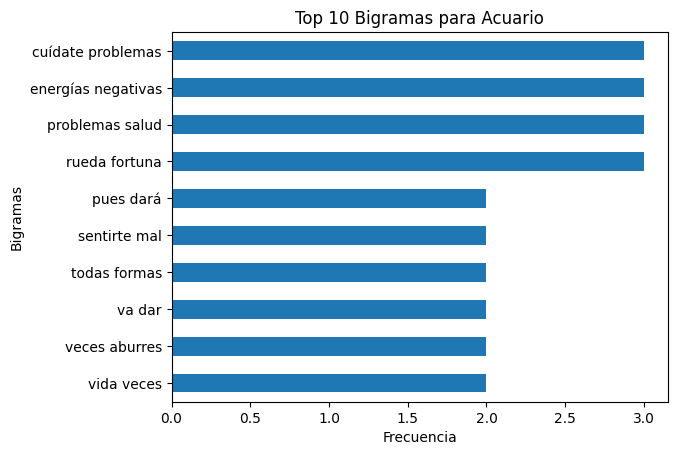

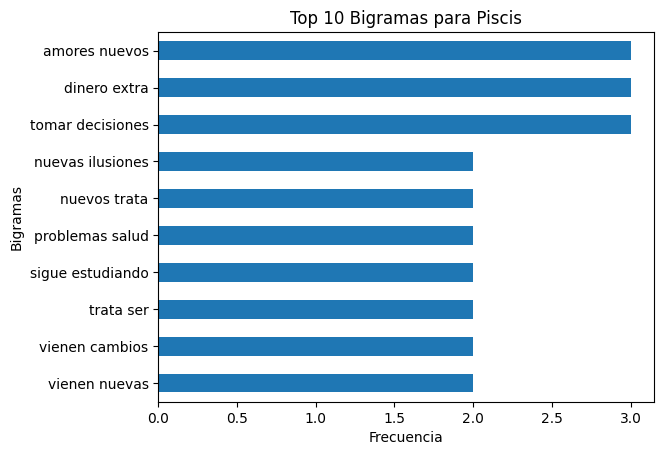

In [ ]:
for k, v in horoscopos_unificados_sin_sw.items():
  top_n_bigrams(k, v)

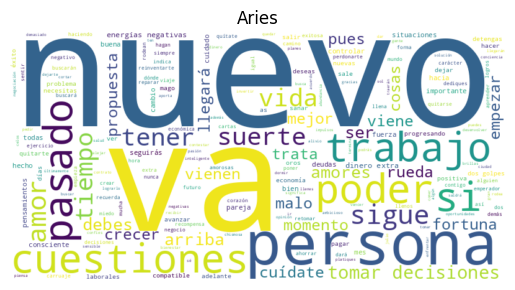

In [ ]:
signo = 'Aries'
wc = WordCloud(width = 800, height = 400, stopwords = sw, background_color='white', repeat = False)
wc.generate(horoscopos_unificados[signo])
plt.axis('off')
plt.title(signo)
plt.imshow(wc, interpolation = 'bilinear')
#plt.savefig('capricornio.png')
plt.show()

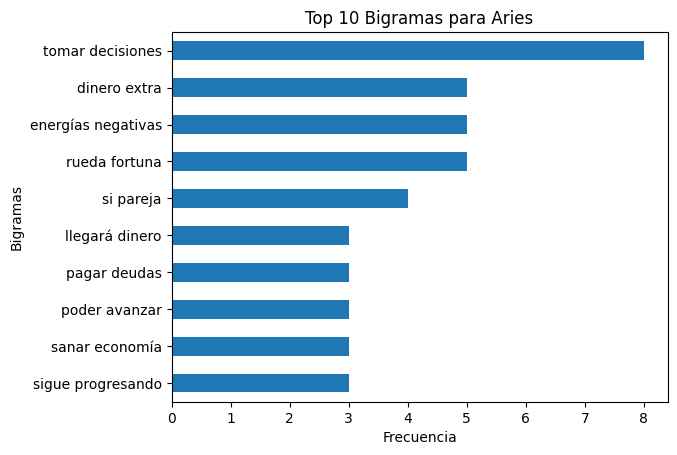

In [ ]:
signo = 'Aries'
tex = horoscopos_unificados_sin_sw[signo]
top_n_bigrams(signo, tex)

# Base para el análisis de sentimientos

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem.snowball import SpanishStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lemma = WordNetLemmatizer()
stemmer = SpanishStemmer(ignore_stopwords=True)

In [ ]:
def stem_w(txt):
  t = txt.split()
  t = [stemmer.stem(w) for w in t]
  t = ' '.join(t)
  return t

In [ ]:
base_asentimet = base[['Signo','Horoscopo','horos_norm']]
base_asentimet['horos_norm'] = base_asentimet['horos_norm'].apply(stem_w)

<ipython-input-43-a4a43f50f30e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_asentimet['horos_norm'] = base_asentimet['horos_norm'].apply(stem_w)


,Signo,Horoscopo,horos_norm
0,Aries,"Te sale la carta de ‘El Mago’, lo que nos indi...",te sal la cart de el mag lo que nos indic que ...
1,Tauro,El ‘AS de Bastos’ nos indica que se vienen var...,el as de bast nos indic que se vien vari dias ...
2,Géminis,"La carta de ‘La Torre’, que nos dice que estás...",la cart de la torr que nos dic que estás hac a...
3,Cáncer,La carta de ‘El Juicio’ nos dice que son momen...,la cart de el juici nos dic que son moment de ...
4,Leo,La carta del ‘Sol’ nos dice que brillarás much...,la cart del sol nos dic que brill mucho en los...


In [ ]:
base_asentimet.to_excel('horoscopos_sentimenta.xlsx', index = False)